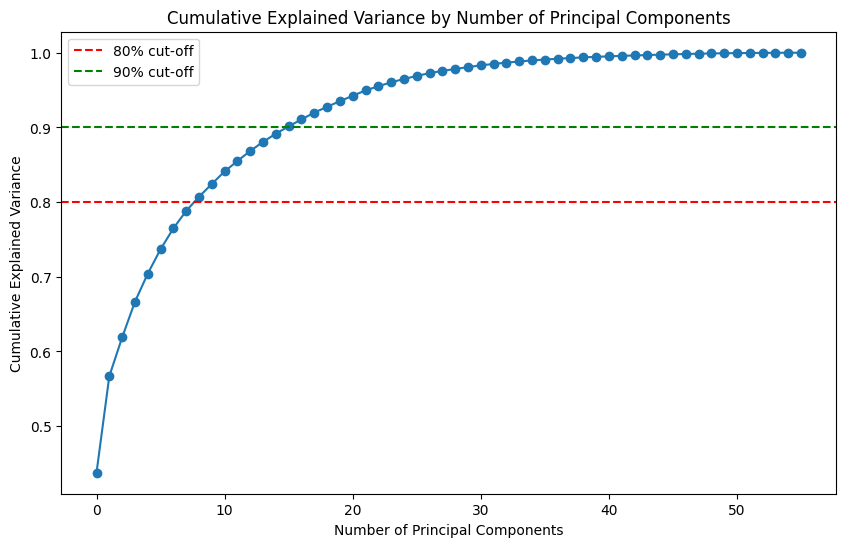

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 날짜 열 제거 및 수치형 데이터 선택
df_numeric = df.drop('date', axis=1)

# 결측값을 평균으로 채우기
df_numeric.fillna(df_numeric.mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA 적용
pca = PCA()
principal_components = pca.fit_transform(df_scaled)

# 설명 분산 비율 확인
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 설명 분산 비율 시각화
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% cut-off')
plt.axhline(y=0.90, color='g', linestyle='--', label='90% cut-off')
plt.legend()
plt.show()


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 날짜 열 제거 및 수치형 데이터 선택
df_numeric = df.drop('date', axis=1)

# 결측값을 평균으로 채우기
df_numeric.fillna(df_numeric.mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA 적용 (주성분 15개로 설정)
pca = PCA(n_components=15)
principal_components = pca.fit_transform(df_scaled)

# PCA 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(15)])

# 날짜 열 추가
df_pca['date'] = df['date']

# PCA 처리된 데이터를 CSV 파일로 저장
df_pca.to_csv('mineral.csv', index=False)

print("PCA 처리된 데이터가 mineral.csv 파일로 저장되었습니다.")


PCA 처리된 데이터가 korea_gdp_pca.csv 파일로 저장되었습니다.


In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 데이터 불러오기
df = pd.read_csv('/content/alldata.csv')

# 날짜 열 제거 및 수치형 데이터 선택
df_numeric = df.drop('date', axis=1)

# 결측값을 평균으로 채우기
df_numeric.fillna(df_numeric.mean(), inplace=True)

# 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# PCA 적용 (주성분 15개로 설정)
pca = PCA(n_components=15)
principal_components = pca.fit_transform(df_scaled)

# PCA 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(data=principal_components, columns=[f'Principal Component {i+1}' for i in range(15)])
df_pca['original_index'] = df.index

# 이상치 탐지 (예: 주성분 중 하나의 z-score를 사용하여 이상치 탐지)
threshold = 3
z_scores = np.abs((df_pca - df_pca.mean()) / df_pca.std())
outliers = df_pca[(z_scores > threshold).any(axis=1)]

# 원래 데이터에서 이상치 항목 찾기
original_outliers = df.loc[outliers['original_index']]

# 결과 출력
print("이상치 데이터:")
print(original_outliers)

# PCA 처리된 데이터가 있는 파일 저장
df_pca.drop('original_index', axis=1, inplace=True)  # original_index는 파일에 저장하지 않음
df_pca['date'] = df['date']  # 날짜 열 추가
df_pca.to_csv('mineral2.csv', index=False)

print("PCA 처리된 데이터가 mineral2.csv 파일로 저장되었습니다.")


이상치 데이터:
           date  국내산화니켈.수출금액  국내산화니켈.수출중량  국내산화니켈.수입금액  국내산화니켈.수입중량  \
0    2024-05-01            0            1           87         2951   
1    2024-04-01            4          100          188        10131   
2    2024-03-01           23        53391          228         5678   
4    2024-01-01           15        54198           83         2868   
5    2023-12-01           17          300          319        19296   
6    2023-11-01            0            0          104         4283   
8    2023-09-01            5        16540          114         2913   
9    2023-08-01            0            0          404        22895   
12   2023-05-01          118       124445          201         4661   
13   2023-04-01            0           20           26          765   
14   2023-03-01          163       105771          225         4811   
16   2023-01-01            0            0          577        23573   
17   2022-12-01           77        31101          610        25608 